In [109]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from numpy.fft import fft, ifft
import pandas as pd

In [110]:
def fourier(signal):
    return np.fft.fft(signal)

In [7]:
def withDCvalue(s):
    df = pd.read_csv(s+'.csv')
    arr = np.array(df)
    openn= []
    for i in range((arr).shape[0]):
        openn.append(arr[i][5])
    tt = fourier(openn)
    x_label = [i for i in range(tt.shape[0])]
    plt.stem(x_label, np.abs(tt), 'b', \
            markerfmt=" ", basefmt="-b")

In [8]:
def withoutDCvalue(s):
    df = pd.read_csv(s+'.csv')
    arr = np.array(df)
    openn= []
    for i in range((arr).shape[0]):
        openn.append(arr[i][5])
    tt = fourier(openn)
    tt = tt[1:]
    x_label = [i for i in range(tt.shape[0])]
    plt.stem(x_label, np.abs(tt), 'b', \
            markerfmt=" ", basefmt="-b")

In [9]:
def withDCvalue_log(s):
    df = pd.read_csv(s+'.csv')
    arr = np.array(df)
    openn= []
    for i in range((arr).shape[0]):
        openn.append(arr[i][5])
    tt = fourier(openn)
    x_label = [i for i in range(tt.shape[0])]
    plt.yscale("log")
    plt.stem(x_label, np.abs(tt), 'b', \
            markerfmt=" ", basefmt="-b")

In [10]:
def withoutDCvalue_log(s):
    df = pd.read_csv(s+'.csv')
    arr = np.array(df)
    openn= []
    for i in range((arr).shape[0]):
        openn.append(arr[i][5])
    tt = fourier(openn)
    tt = tt[1:]
    x_label = [i for i in range(tt.shape[0])]
    plt.yscale("log")
    plt.stem(x_label, np.abs(tt), 'b', \
            markerfmt=" ", basefmt="-b")

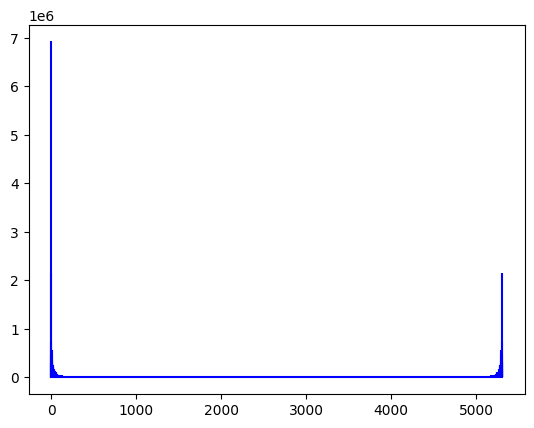

In [11]:
withDCvalue("HDFC")



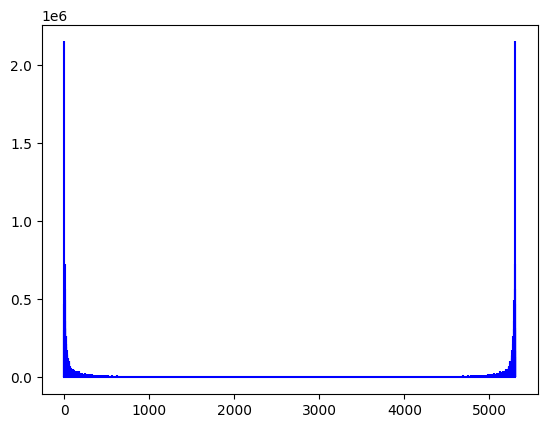

In [12]:
withoutDCvalue("HDFC")

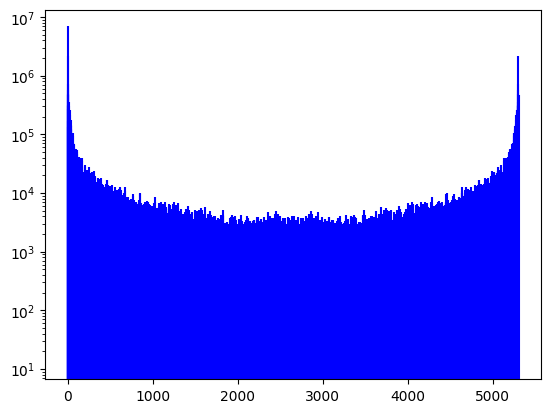

In [13]:
withDCvalue_log("HDFC")

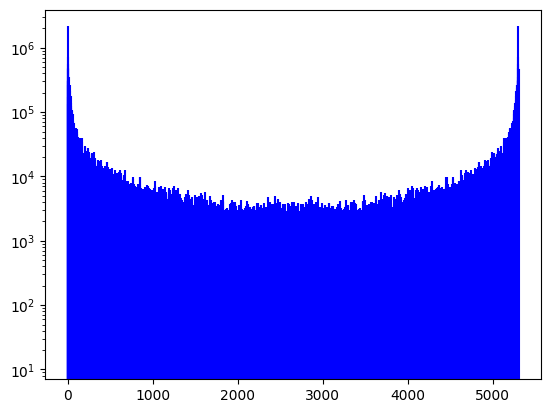

In [14]:
withoutDCvalue_log("HDFC")

In [36]:
def low_pass_filtering(arrr):
    n= arrr.shape[0]
    for i in range(n):
        arrr[i] = (arrr[i]*abs(i-n//2))/(n/2)
    return arrr

In [111]:
def high_pass_filtering(arrr):
    n= arrr.shape[0]
    for i in range(n):
        if (i< n//8 or i >7*n//8): 
            arrr[i] =0 

    return arrr

In [113]:
def highfrequencies(s):
    df = pd.read_csv(s+'.csv')
    arr = np.array(df)
    openn= []
    for i in range((arr).shape[0]):
        openn.append(arr[i][5])
    tt = fourier(openn)
    tt = high_pass_filtering(tt)
    x_label = [i for i in range(tt.shape[0])]
    plt.stem(x_label, np.abs(tt), 'b', \
            markerfmt=" ", basefmt="-b")

<StemContainer object of 3 artists>

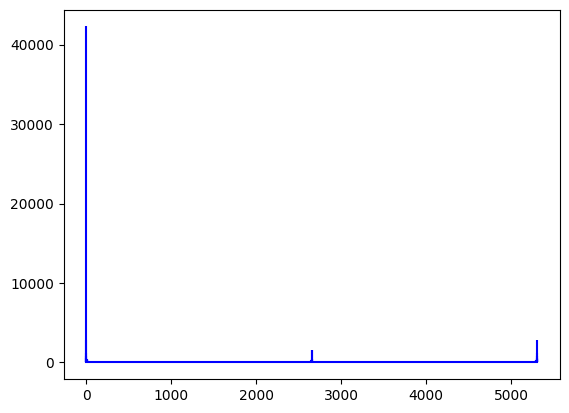

In [60]:
df = pd.read_csv('HDFC.csv')
arr = np.array(df)
openn= []
for i in range((arr).shape[0]):
    openn.append(arr[i][5])
tt = fourier(openn)
tt = tt[1:]
abstt = np.abs(tt)
logtt = np.log(abstt) 
x_label = [i for i in range(tt.shape[0] )]
# plt.stem(x_label,logtt, 'b', \
#         markerfmt=" ", basefmt="-b")
# x_label = [i for i in range(tt.shape[0] -1 )]
fft_of_log_of_fft = fft(logtt)
# fft_of_log_of_fft = fft_of_log_of_fft[1:]
abs_fft_log = np.abs(fft_of_log_of_fft)
plt.stem(x_label,abs_fft_log, 'b', \
        markerfmt=" ", basefmt="-b")


In [62]:
filtered = low_pass_filtering(abs_fft_log)


<StemContainer object of 3 artists>

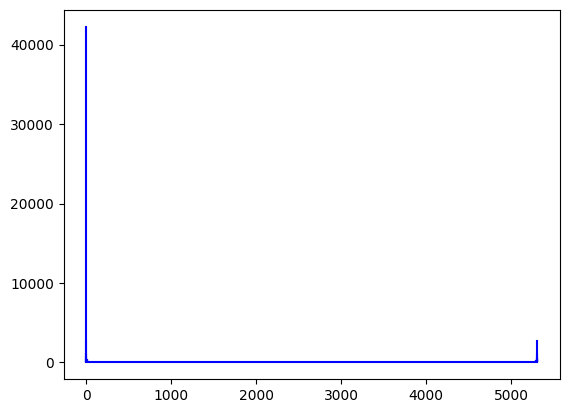

In [63]:
plt.stem(x_label,filtered, 'b', \
        markerfmt=" ", basefmt="-b")


In [67]:
back_to_1_fft = ifft(filtered)
abs_back_to_fft = np.abs(back_to_1_fft)
abs_back_to_fft_withoutDC =abs_back_to_fft[1:]

<StemContainer object of 3 artists>

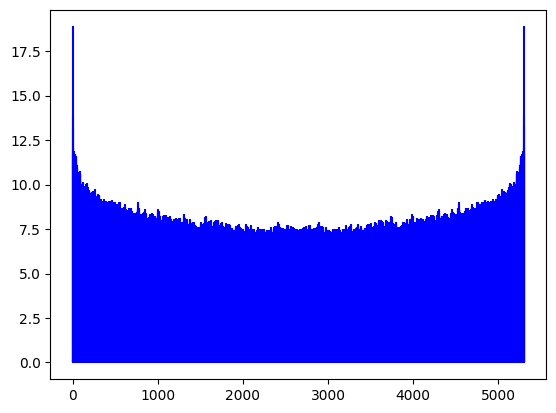

In [68]:
plt.stem(x_label[1:],abs_back_to_fft_withoutDC, 'b', \
        markerfmt=" ", basefmt="-b")

In [74]:
# np.polyfit(x_label[1:],abs_back_to_fft_withoutDC,100)
c = np.polyfit([1,2,3],[1,2,4],1)
y = np.poly1d(c)
y([1,2,3])

array([0.83333333, 2.33333333, 3.83333333])

In [104]:
c = np.polyfit(x_label[1:],abs_back_to_fft_withoutDC,16)
y = np.poly1d(c)
tttt = y(x_label[1:])


<StemContainer object of 3 artists>

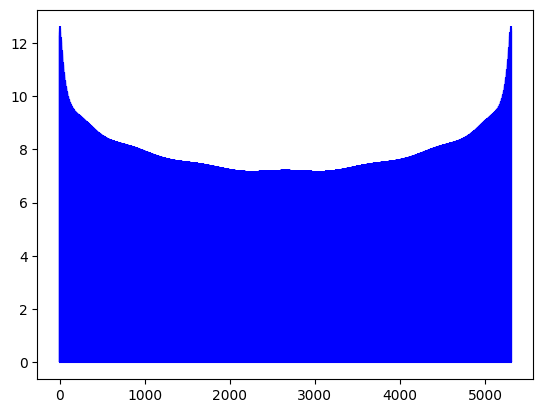

In [105]:
plt.stem(x_label[1:],tttt, 'b', \
        markerfmt=" ", basefmt="-b")

In [107]:
t12 = np.exp(abs_back_to_fft_withoutDC)

In [108]:
ifft(t12)

array([66071.32218863  +0.j        , 64205.9112537  -38.02957064j,
       63463.23856878 -75.17938813j, ..., 63072.468488  +112.07478065j,
       63463.23856878 +75.17938813j, 64205.9112537  +38.02957064j])

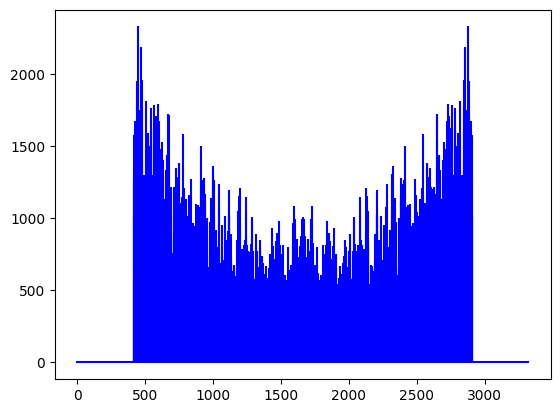

In [114]:
highfrequencies('ADANIPORTS')